In [1]:
import pandas as pd

In [2]:
dataset_train = pd.read_csv('../../data/modified/blogData_newTrainET.csv')
dataset_test = pd.read_csv('../../data/modified/blogData_newTestET.csv')

In [3]:
x_test = dataset_test.iloc[:, 0:-1]
y_test = dataset_test.iloc[:,-1]

In [4]:
x_train = dataset_train.iloc[:,0:-1]
y_train = dataset_train.iloc[:,-1]

In [5]:
dados = dataset_train.iloc[:500, :280]

In [6]:
print(len(x_train)/(len(x_train) + len(x_test))) # % de treino
print(len(x_test)/(len(x_train) + len(x_test))) # % de teste

0.8729777911064461
0.12702220889355392


In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import time

init = time.time()

neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
cv = cross_val_score(neigh,x_test, y_test,scoring='r2')
neigh_score = neigh.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)

print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(neigh_score))
print(cv)
print('MAE: {}'.format(mae))

Execution time: 6.048213005065918 seconds
R2 score: 0.392903077237462
[ 0.41993899  0.31615355  0.38354786]
MAE: 5.3507345225603355


In [8]:
import numpy as np

k = 10  # 10-fold
scores = cross_val_score(neigh,x_test, y_test,cv= k)
print(scores)
hite_rate = np.mean(scores) 
print("Mean : " + str(hite_rate))

[ 0.43836517 -0.15374699  0.6907497   0.38279061  0.45854447  0.12146374
  0.37641337  0.4148255   0.47798124  0.48166582]
Mean : 0.368905261726


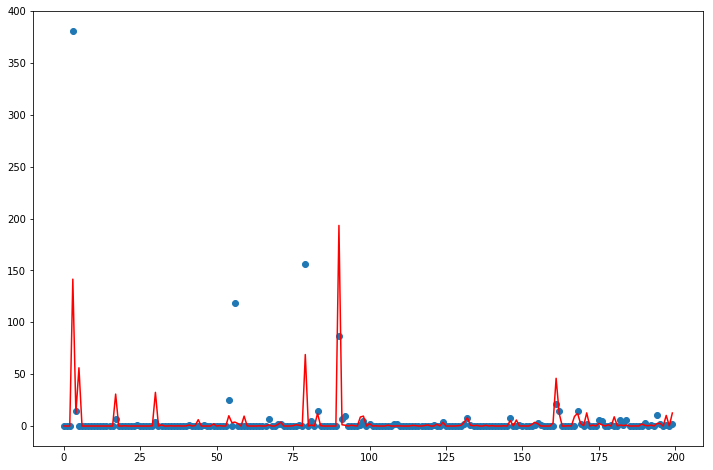

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.show()